In [5]:
import os
import sys
import SimpleITK as sitk
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import zoom
sys.path.append('/home/local/VANDERBILT/litz/github/MASILab/thoraxtools')
import func.vis.vis as vis

In [6]:
def clip_LAS(img, xyz):
    x, y , z = xyz
    clip_sag = img[x, :, :]
    clip_sag = np.flip(clip_sag, 0)
    clip_sag = np.rot90(clip_sag)
    clip_cor = img[:, y, :]
    clip_cor = np.rot90(clip_cor)
    clip_ax = img[:, :, z]
    clip_ax = np.rot90(clip_ax)
    return (clip_sag, clip_cor, clip_ax)
def vis_overlay_single_plane(img, label, xyz, plane="axial", orientation="LAS", cmap="turbo", clip_range=(-1024,600), mask_range=(0,5)):
    # convert 0 to np.nan to make mask transparent
    label = np.where(label==0, np.nan, label)

    img_clips = clip_LAS(img, xyz) if orientation == "LAS" else clip_LPS(img, xyz)
    label_clips = clip_LAS(label, xyz) if orientation == "LAS" else clip_LPS(label, xyz)

    i = 0 if plane=="sagittal" else 1 if plane=="coronal" else 2
    img_clip = img_clips[i]
    label_clip = label_clips[i]

    f = plt.figure(figsize=(20, 20))
    plt.imshow(img_clip, interpolation='bilinear', cmap="gray", alpha=0.8, vmin=clip_range[0], vmax=clip_range[1])
    plt.imshow(label_clip, interpolation='none', cmap=cmap, alpha=0.5, vmin=mask_range[0], vmax=mask_range[1])
    
def single_overlay_slices(img, label, xyz, orientation="LAS", cmap="turbo", clip_range=(-1024, 600), mask_range=(0,5)):
    label = np.where(label==0, np.nan, label)
    img_clip_sag, img_clip_cor, img_clip_ax = clip_LAS(img, xyz) if orientation == "LAS" else clip_LPS(img, xyz)
    label_clip_sag, label_clip_cor, label_clip_ax = clip_LAS(label, xyz) if orientation == "LAS" else clip_LPS(label, xyz)
    if len(clip_range) > 0:
        vmin = clip_range[0]
        vmax = clip_range[1]
    else:
        vmax = np.max(img)
        vmin = np.min(img)
    f, ax = plt.subplots(1, 3, figsize=(15, 15))
    
    sag = ax[0].imshow(img_clip_sag, interpolation='bilinear', cmap="gray", alpha=1.0, vmin=clip_range[0], vmax=clip_range[1])
    ax[0].imshow(label_clip_sag, interpolation='none', cmap=cmap, alpha=0.5, vmin=mask_range[0], vmax=mask_range[1])
    ax[1].imshow(img_clip_cor, interpolation='bilinear', cmap="gray", alpha=1.0, vmin=clip_range[0], vmax=clip_range[1])
    ax[1].imshow(label_clip_cor, interpolation='none', cmap=cmap, alpha=0.5, vmin=mask_range[0], vmax=mask_range[1])
    ax[2].imshow(img_clip_ax, interpolation='bilinear', cmap="gray", alpha=1.0, vmin=clip_range[0], vmax=clip_range[1])
    ax[2].imshow(label_clip_ax, interpolation='none', cmap=cmap, alpha=0.5, vmin=mask_range[0], vmax=mask_range[1])

In [7]:
# find active learning scans that have high emphysema volume


In [8]:
luna_raw_dir = "/home/local/VANDERBILT/litz/data/luna16/preproc_qa"
luna_johof_dir = "/home/local/VANDERBILT/litz/data/luna16/johof_fused"
luna_label_dir = "/home/local/VANDERBILT/litz/data/luna16/fixed_labels"
vu_raw_dir = "/home/local/VANDERBILT/litz/data/imagevu/nifti/active_learning/dataset_rand/train"
vu_johof_dir = "/home/local/VANDERBILT/litz/data/imagevu/nifti/active_learning/dataset_rand/johof"
vu_label_dir = "/home/local/VANDERBILT/litz/data/imagevu/nifti/active_learning/dataset_rand/label_nifti"

In [11]:
scanid = "1.3.6.1.4.1.14519.5.2.1.6279.6001.259018373683540453277752706262"
raw_path = os.path.join(luna_raw_dir, f"{scanid}.mhd")
johof_path = os.path.join(luna_johof_dir, f"johof_fused_{scanid}.mhd")
label_path = os.path.join(luna_label_dir, f"{scanid}_LobeSegmentation.nrrd")
raw_sitk = sitk.ReadImage(raw_path)
johof_sitk = sitk.ReadImage(johof_path)
label_sitk = sitk.ReadImage(label_path)
raw_img = np.swapaxes(sitk.GetArrayFromImage(raw_sitk), 0,2)
johof_img = np.swapaxes(sitk.GetArrayFromImage(johof_sitk), 0,2)
label_img = np.swapaxes(sitk.GetArrayFromImage(label_sitk), 0,2)

# vu_scanid = "00001034time20180711"
vu_scanid = "00001033time20181022"
# vu_scanid = "00000541time20180628"
vu_raw_path = os.path.join(vu_raw_dir, f"{vu_scanid}.nii.gz")
vu_path = os.path.join(vu_johof_dir, f"johof_{vu_scanid}.nii.gz")
vu_label_path = os.path.join(vu_label_dir, f"{vu_scanid}_lvlsetseg.nii.gz")
vu_label_nib = nib.load(vu_label_path)
vu_nib = nib.load(vu_path)
vu_raw_nib = nib.load(vu_raw_path)
vu_raw_img = vu_raw_nib.get_fdata()
vu_label_img = vu_label_nib.get_fdata()
vu_img = vu_nib.get_fdata()



Total emphysema 
20180711	All	5359.94006916153	61.8324823627174	0.011536039874489	5298.10758679882	0.988463960125511

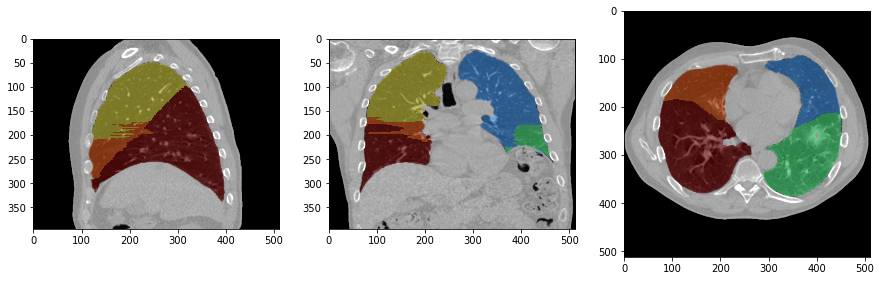

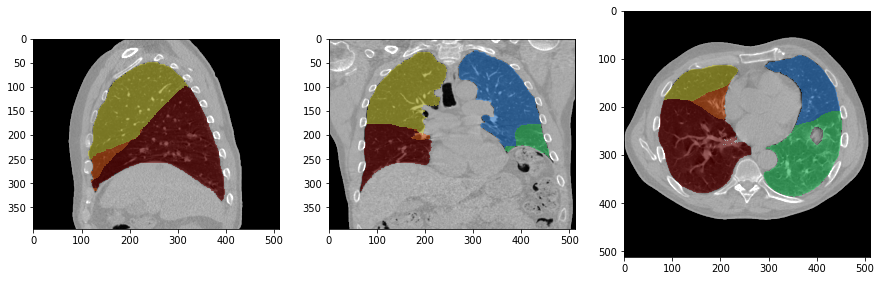

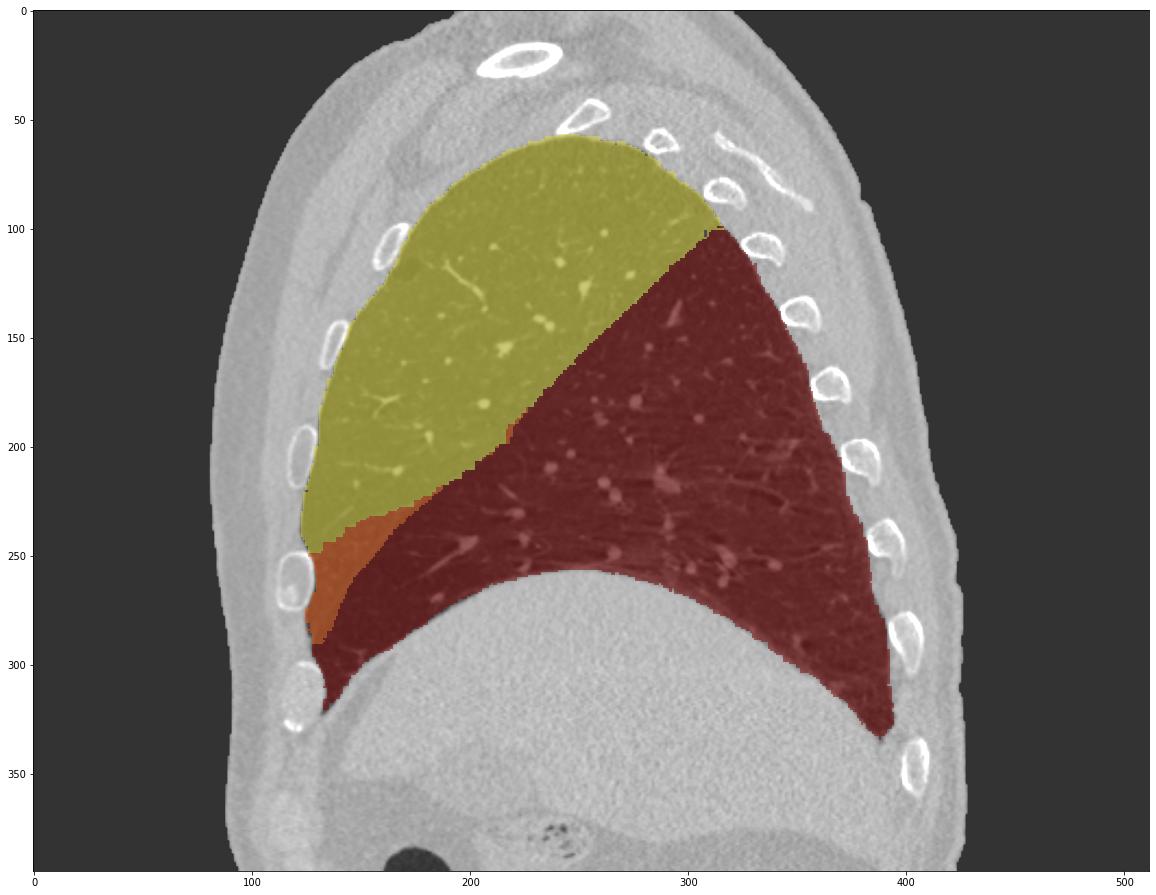

In [23]:
# scale_label_img = cv2.resize(label_img, dsize=(130,130), interpolation=cv2.INTER_NEAREST)
# scale_johof_img = 
xyz = (150, 280, 176)
# vis.vis_slices(vu_img, xyz, "LAS", "turbo")
# vis.vis_slices(vu_label_img, xyz, "LAS", "turbo")
single_overlay_slices(vu_raw_img, vu_img, xyz, "LAS", "turbo")
single_overlay_slices(vu_raw_img, vu_label_img, xyz, "LAS", "turbo")
vis_overlay_single_plane(vu_raw_img, vu_label_img, (135, 326, 176), "sagittal", "LAS")
# vis_slices(vu_img, (150,120,250), "LAS")

In [120]:
def resize_xy(vol, dim=(100,100), interpolation=cv2.INTER_NEAREST):
    x, y, z = vol.shape
    vol_re = np.zeros((dim[0], dim[1], z))
    print(vol_re.shape)
    for i in range(z):
        img = vol[:, : ,i]
        img_re = cv2.resize(img, dsize=dim, interpolation=interpolation)
        vol_re[:,:,i] = img_re
    return vol_re

label_img = np.array(label_img, dtype=np.uint8)
scale_raw_img = resize_xy(raw_img, (180,180), cv2.INTER_CUBIC)
scale_johof_img = resize_xy(johof_img, (180, 180))
scale_label_img = resize_xy(label_img, (180, 180))
scale_johof_img.shape

(180, 180, 130)
(180, 180, 130)
(180, 180, 130)


(180, 180, 130)

In [15]:
# save figures
fig_dir = '/home/local/VANDERBILT/litz/github/MASILab/lobe_seg/tmp'
vis.vis_sag(scale_raw_img, 69, "LPS", "gray", [-1024, 600])
plt.savefig(os.path.join(fig_dir, 'fig_raw_sag.png'))
vis.vis_sag(scale_johof_img, 69, "LPS", "turbo")
plt.savefig(os.path.join(fig_dir, 'fig_johof_sag.png'))
vis.vis_sag(scale_label_img, 69, "LPS", "turbo")
plt.savefig(os.path.join(fig_dir, 'fig_label_sag.png'))
vis.vis_cor(scale_raw_img, 87, "LPS", "gray", [-1024, 600])
plt.savefig(os.path.join(fig_dir, 'fig_raw_cor.png'))
vis.vis_cor(scale_johof_img, 87, "LPS", "turbo")
plt.savefig(os.path.join(fig_dir, 'fig_johof_cor.png'))
vis.vis_cor(scale_label_img, 87, "LPS", "turbo")
plt.savefig(os.path.join(fig_dir, 'fig_label_cor.png'))
vis.vis_ax(scale_raw_img, 63, "LPS", "gray", [-1024, 600])
plt.savefig(os.path.join(fig_dir, 'fig_raw_ax.png'))
vis.vis_ax(scale_johof_img, 63, "LPS", "turbo")
plt.savefig(os.path.join(fig_dir, 'fig_johof_ax.png'))
vis.vis_ax(scale_label_img, 63, "LPS", "turbo")
plt.savefig(os.path.join(fig_dir, 'fig_label_ax.png'))


NameError: name 'scale_raw_img' is not defined

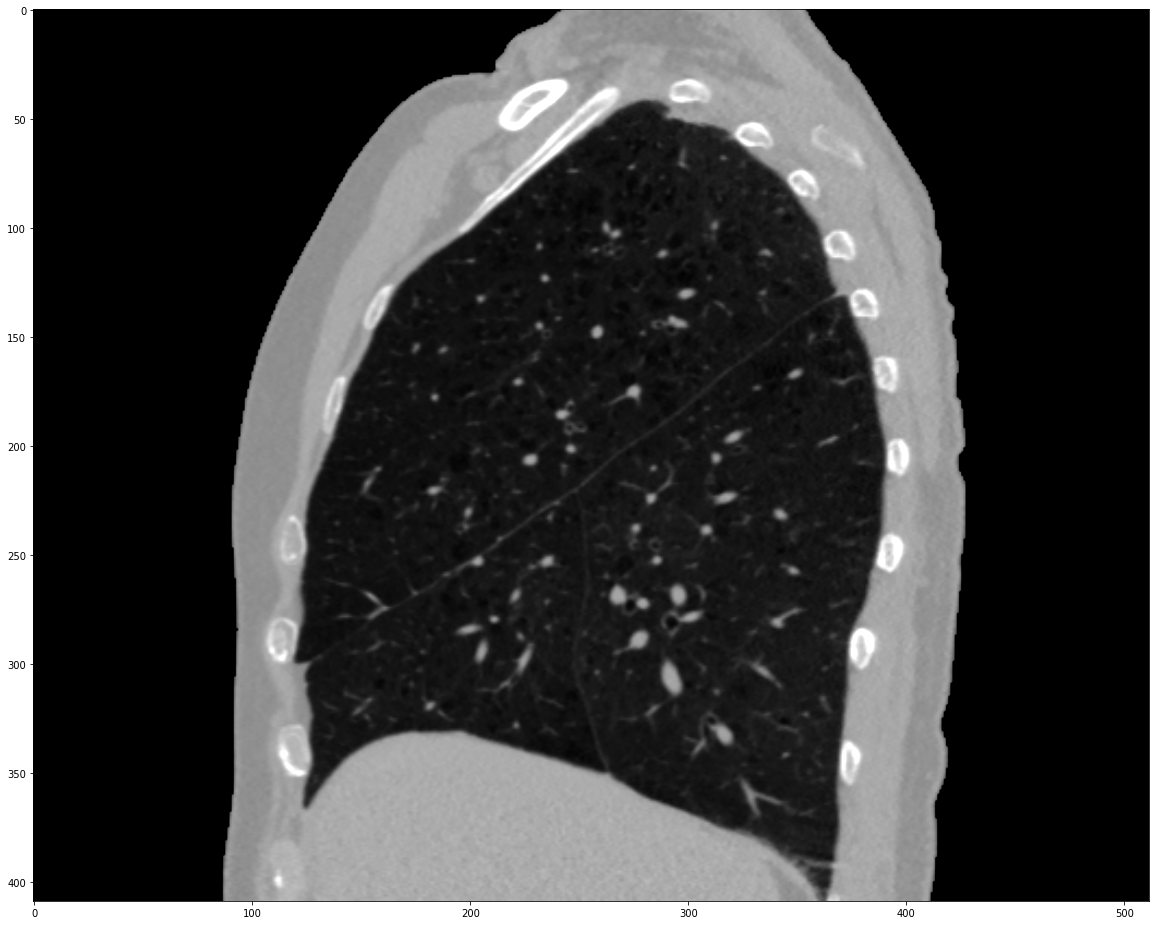

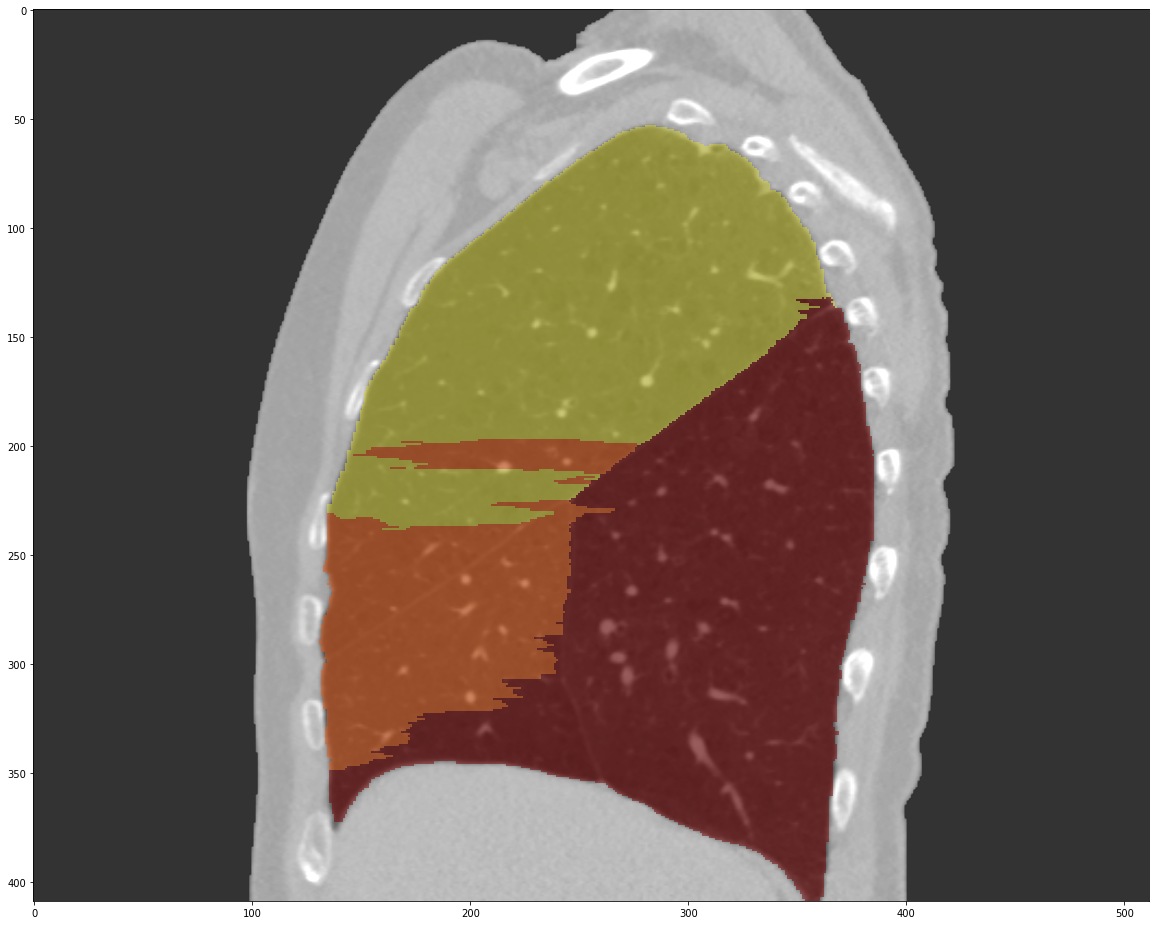

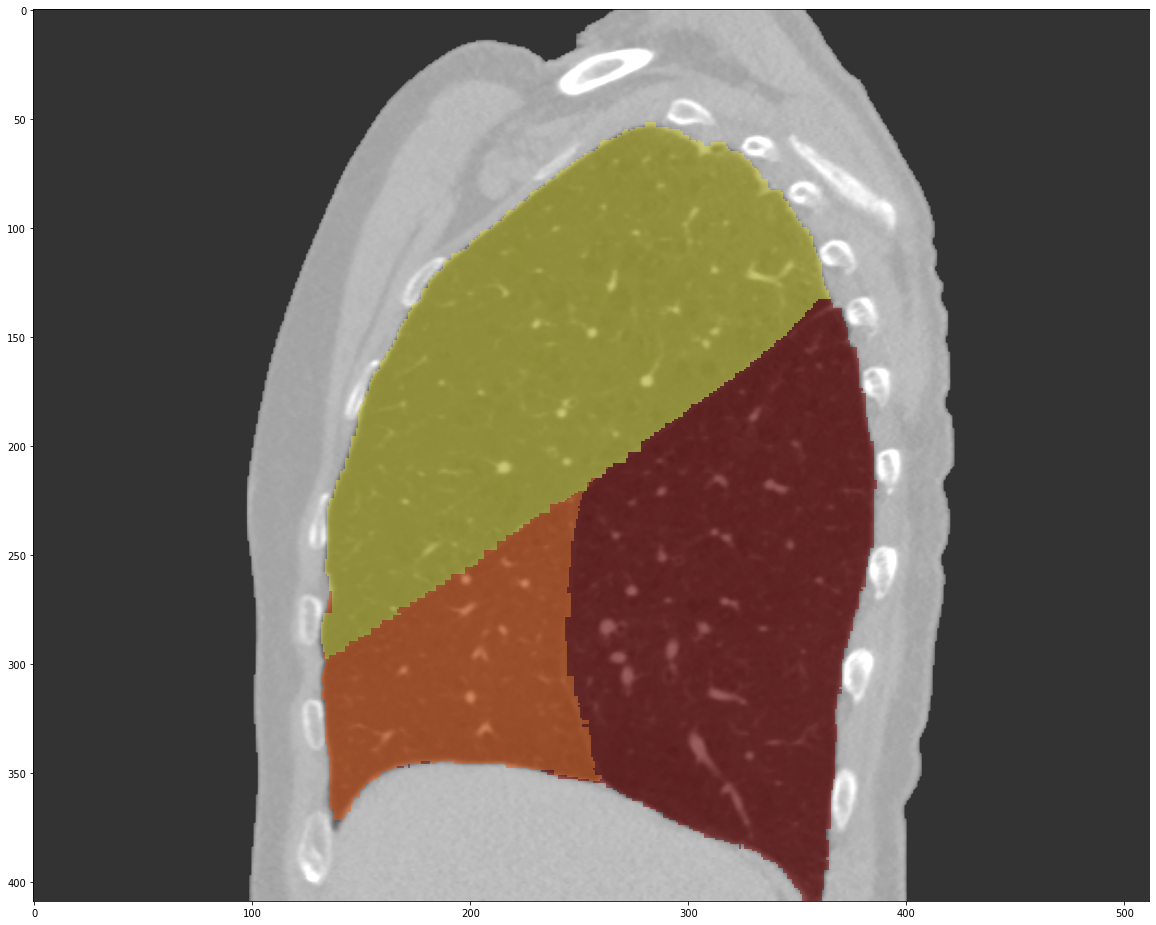

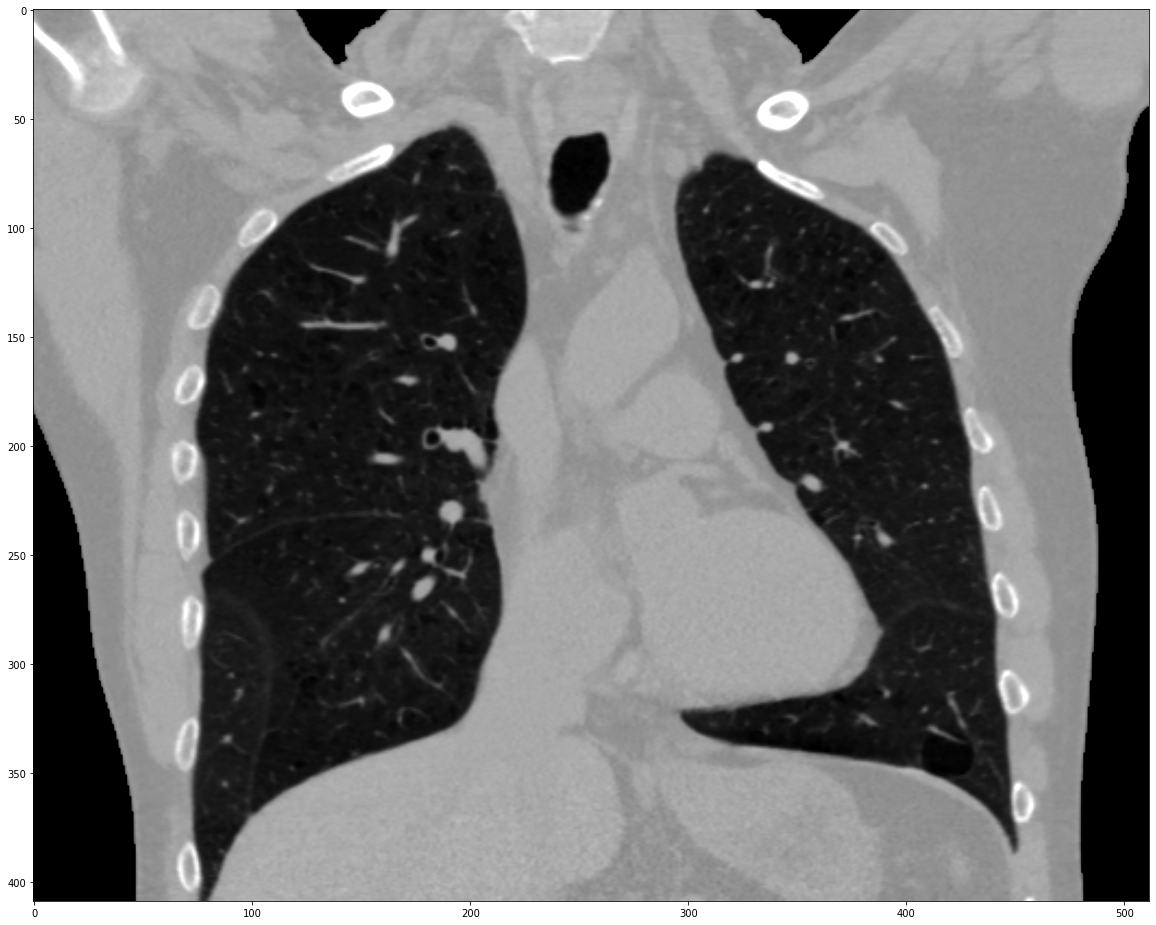

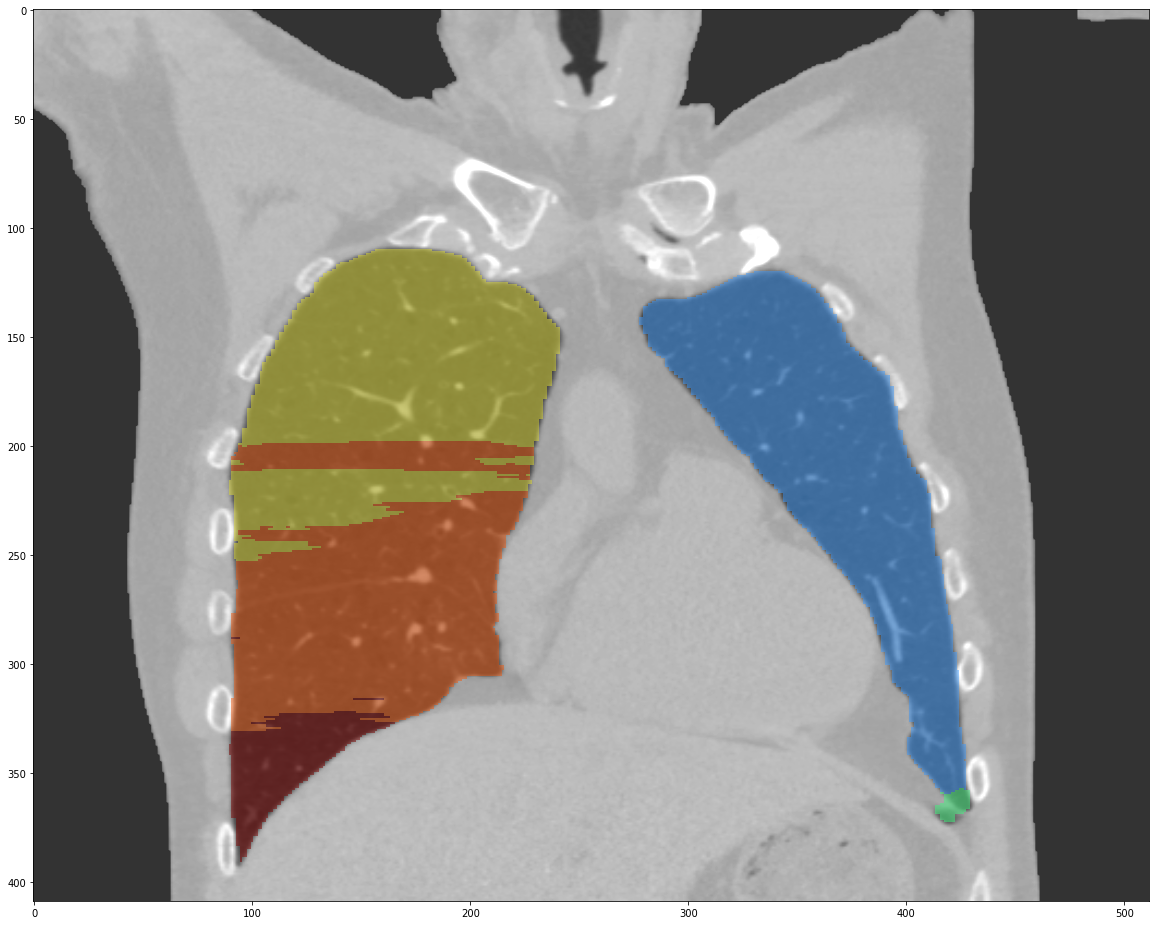

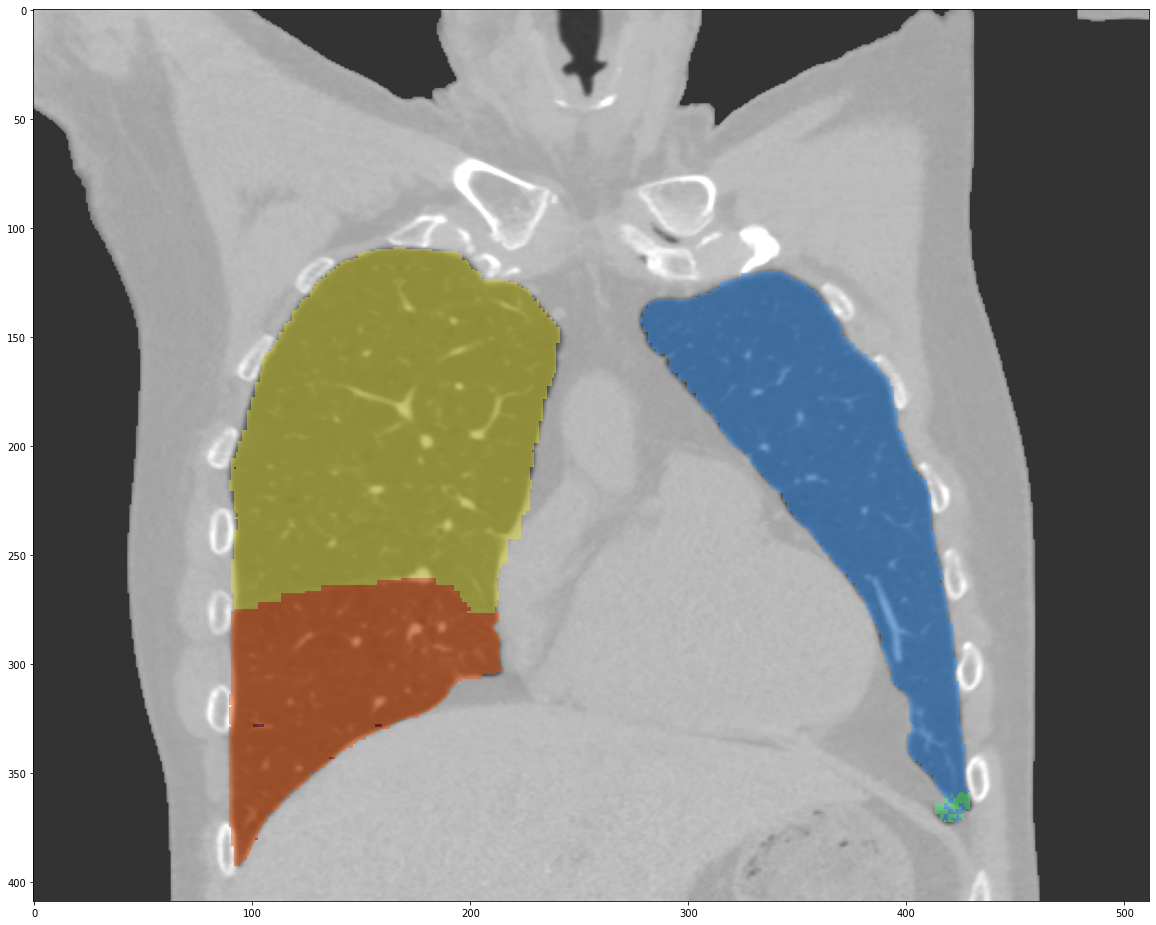

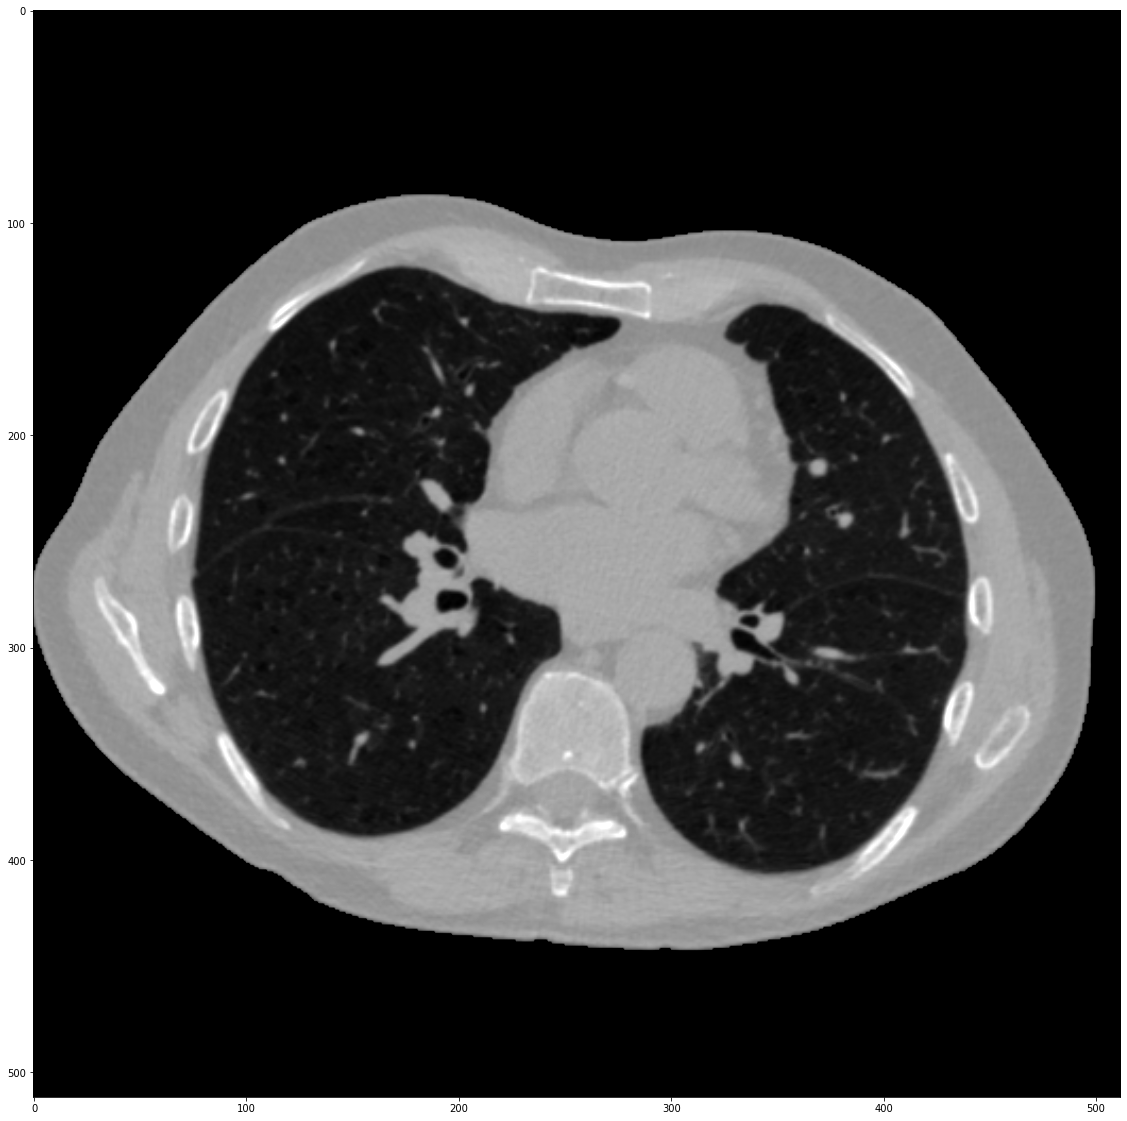

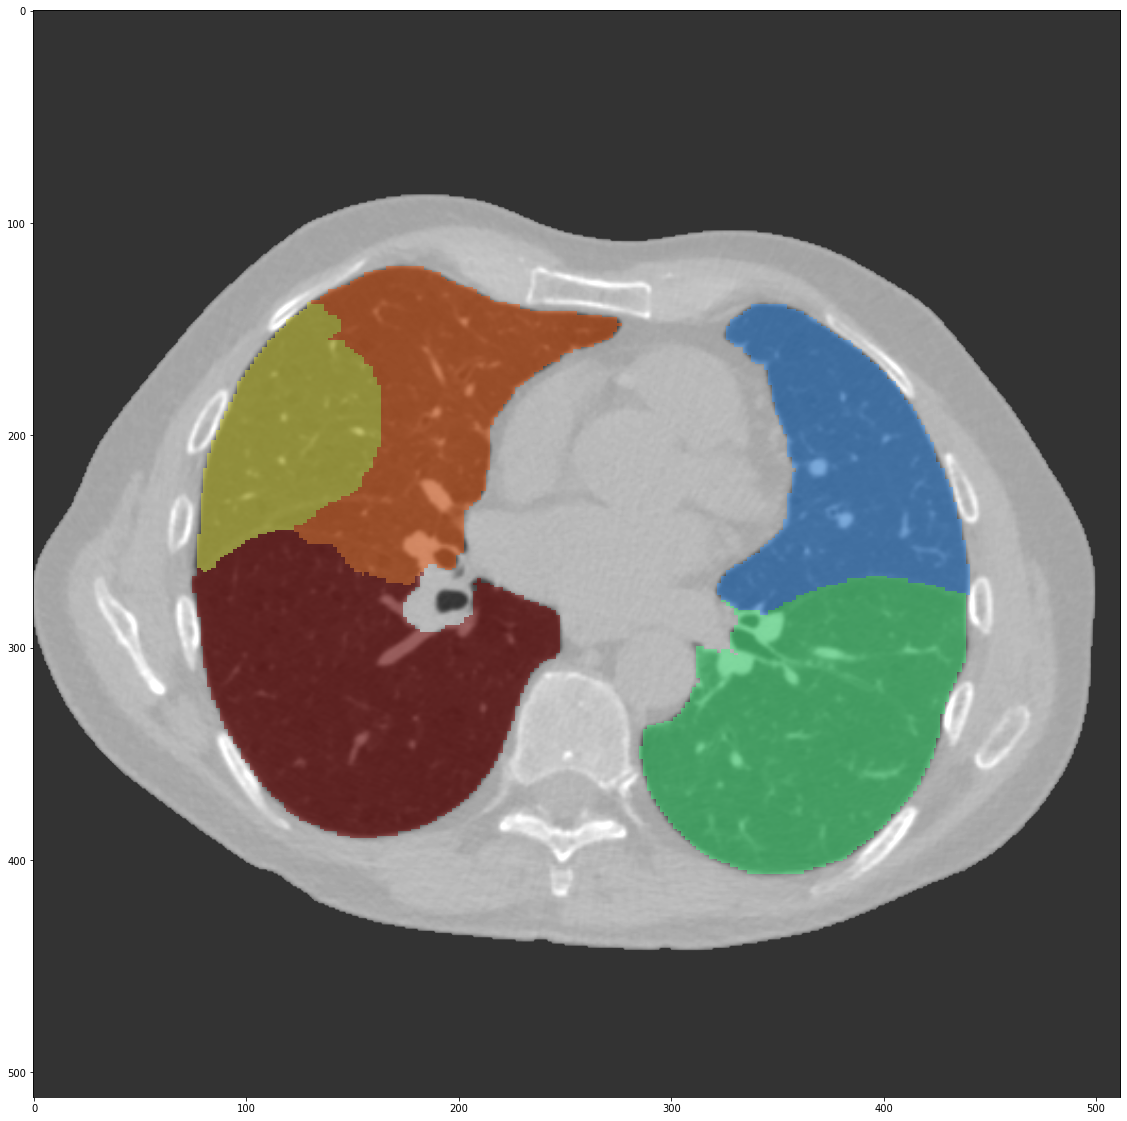

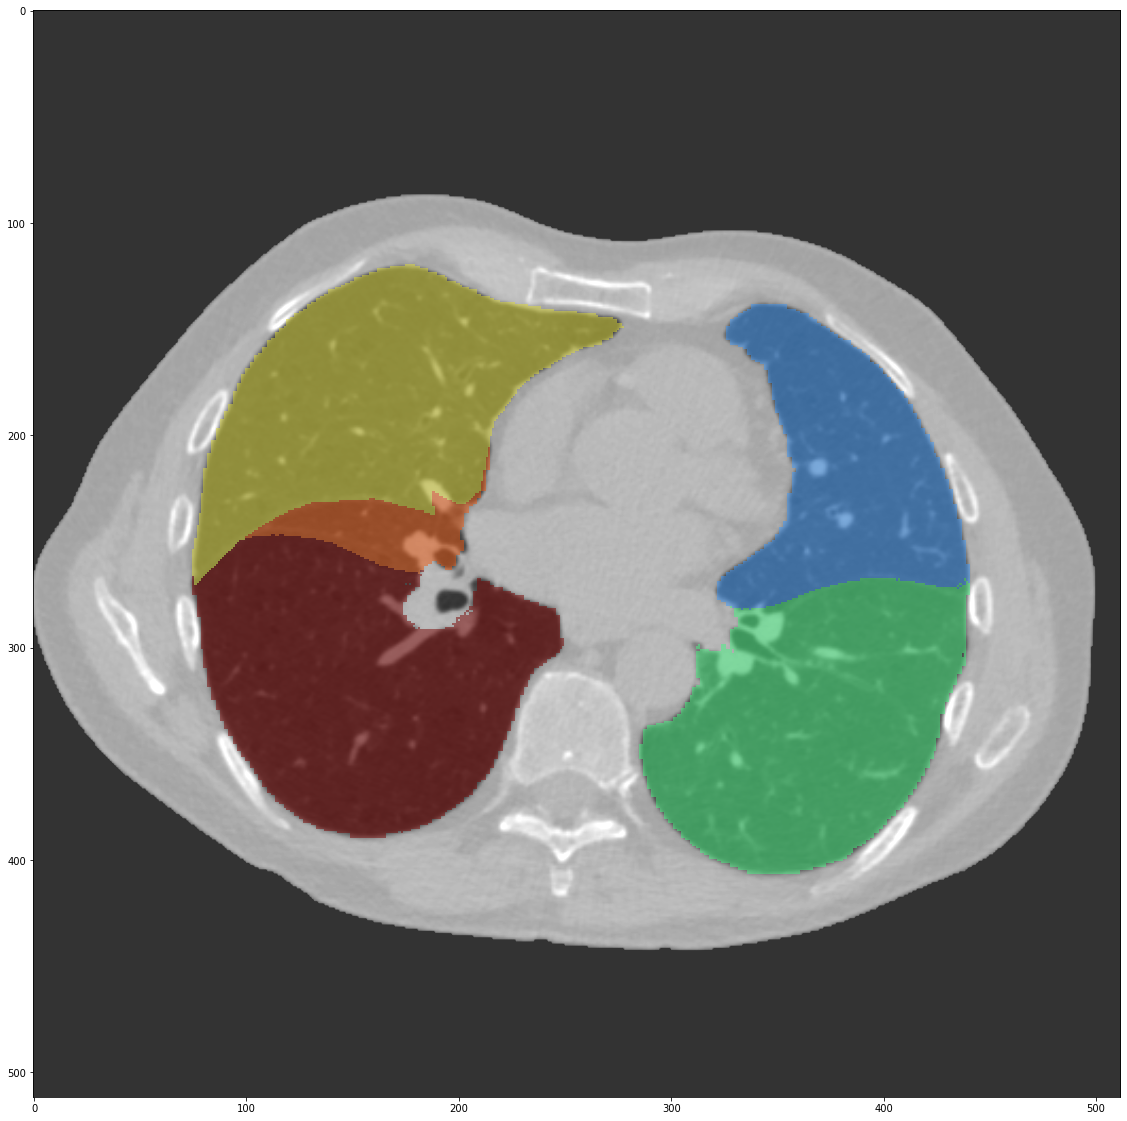

In [13]:
# (135, 326, 176)
# (155, 280, 176)

fig_dir = '/home/local/VANDERBILT/litz/github/MASILab/lobe_seg/tmp'
vis.vis_sag(vu_raw_img, 155, "LAS", "gray", colorbar=False)
plt.savefig(os.path.join(fig_dir, 'fig_vu_raw_sag.png'))
vis_overlay_single_plane(vu_raw_img, vu_img, (135, 326, 176), "sagittal", "LAS")
plt.savefig(os.path.join(fig_dir, 'fig_vu_johof_sag.png'))
vis_overlay_single_plane(vu_raw_img, vu_label_img, (135, 326, 176), "sagittal", "LAS")
plt.savefig(os.path.join(fig_dir, 'fig_vu_label_sag.png'))
vis.vis_cor(vu_raw_img, 280, "LAS", "gray", colorbar=False)
plt.savefig(os.path.join(fig_dir, 'fig_vu_raw_cor.png'))
vis_overlay_single_plane(vu_raw_img, vu_img, (135, 326, 176), "coronal", "LAS")
plt.savefig(os.path.join(fig_dir, 'fig_vu_johof_cor.png'))
vis_overlay_single_plane(vu_raw_img, vu_label_img, (135, 326, 176), "coronal", "LAS")
plt.savefig(os.path.join(fig_dir, 'fig_vu_label_cor.png'))
vis.vis_ax(vu_raw_img, 176, "LAS", "gray", colorbar=False)
plt.savefig(os.path.join(fig_dir, 'fig_vu_raw_ax.png'))
vis_overlay_single_plane(vu_raw_img, vu_img, (135, 326, 176), "axial", "LAS")
plt.savefig(os.path.join(fig_dir, 'fig_vu_johof_ax.png'))
vis_overlay_single_plane(vu_raw_img, vu_label_img, (135, 326, 176), "axial", "LAS")
plt.savefig(os.path.join(fig_dir, 'fig_vu_label_ax.png'))

array([0, 1, 2, 3, 4, 5], dtype=uint8)